# Post-run data Analysis
So after finishing a run of mujoco.py, this file is used to analyze the output of the CP + IKIN controller versus the BC Controller



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
state_columns = [
    "L_YAW_pos", "L_HAA_pos", "L_HFE_pos", "L_KFE_pos", "L_ANKLE_pos",
    "R_YAW_pos", "R_HAA_pos", "R_HFE_pos", "R_KFE_pos", "R_ANKLE_pos",
    "L_YAW_vel", "L_HAA_vel", "L_HFE_vel", "L_KFE_vel", "L_ANKLE_vel",
    "R_YAW_vel", "R_HAA_vel", "R_HFE_vel", "R_KFE_vel", "R_ANKLE_vel", 
    "vel_x_BF", "vel_y_BF", "vel_z_BF", "normal_vec_x_BF", "normal_vec_y_BF", "normal_vec_z_BF", 
    "omega_x", "omega_y", "omega_z", "vx_des_BF", "vy_des_BF", 
    "right_foot_t_since_contact", "right_foot_t_since_no_contact", 
    "right_foot_pos_x_BF", "right_foot_pos_y_BF", "right_foot_pos_z_BF",
    "left_foot_t_since_contact", "left_foot_t_since_no_contact",
    "left_foot_pos_x_BF", "left_foot_pos_y_BF", "left_foot_pos_z_BF"
]
action_columns = [
    "L_YAW_tau_ff", "L_HAA_tau_ff", "L_HFE_tau_ff", "L_KFE_tau_ff", "L_ANKLE_tau_ff",
    "R_YAW_tau_ff", "R_HAA_tau_ff", "R_HFE_tau_ff", "R_KFE_tau_ff", "R_ANKLE_tau_ff",
    "L_YAW_q_des", "L_HAA_q_des", "L_HFE_q_des", "L_KFE_q_des", "L_ANKLE_q_des",
    "R_YAW_q_des", "R_HAA_q_des", "R_HFE_q_des", "R_KFE_q_des", "R_ANKLE_q_des",
    "L_YAW_q_vel_des", "L_HAA_q_vel_des", "L_HFE_q_vel_des", "L_KFE_q_vel_des", "L_ANKLE_q_vel_des",
    "R_YAW_q_vel_des", "R_HAA_q_vel_des", "R_HFE_q_vel_des", "R_KFE_q_vel_des", "R_ANKLE_q_vel_des"
]
# NN policy columns:
nn_policy_columns = [ x + "_policy" for x in action_columns ]

In [3]:
# just take the original data that is collected.
og_data = "../../sim_mujoco/data/dataset_comparison_spectral.csv"
og_data = pd.read_csv(og_data)
og_num_steps = og_data.shape[0]
og_actions = og_data[action_columns].to_numpy(dtype=np.float64)
og_policy_actions = og_data[nn_policy_columns].to_numpy(dtype=np.float64)



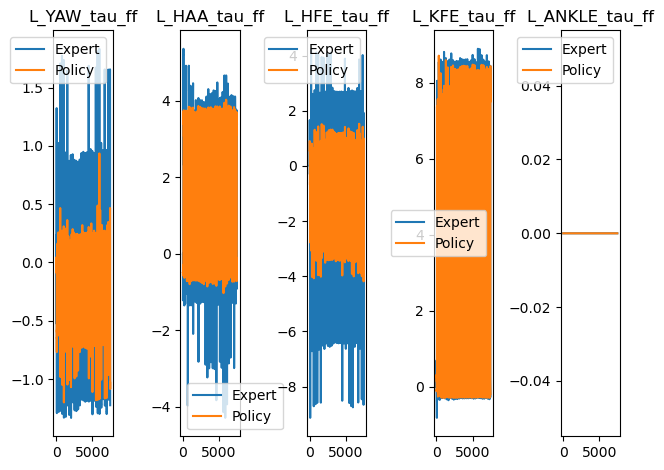

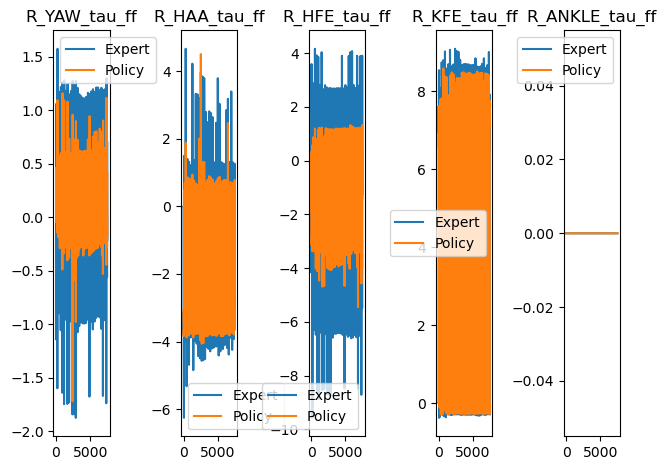

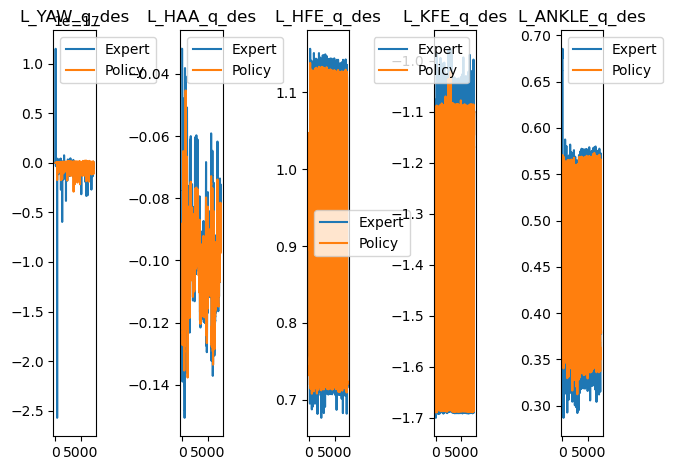

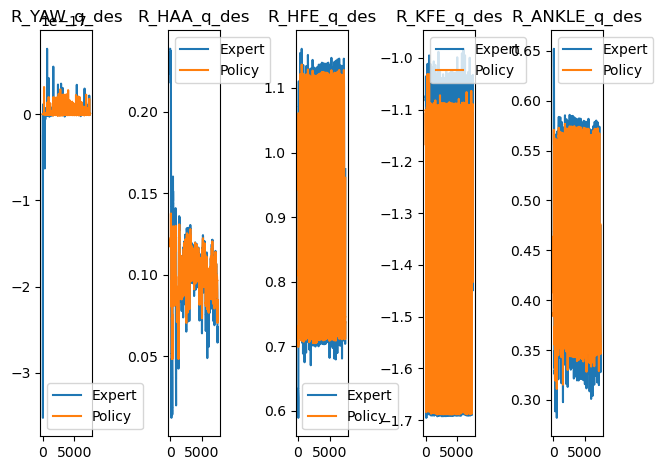

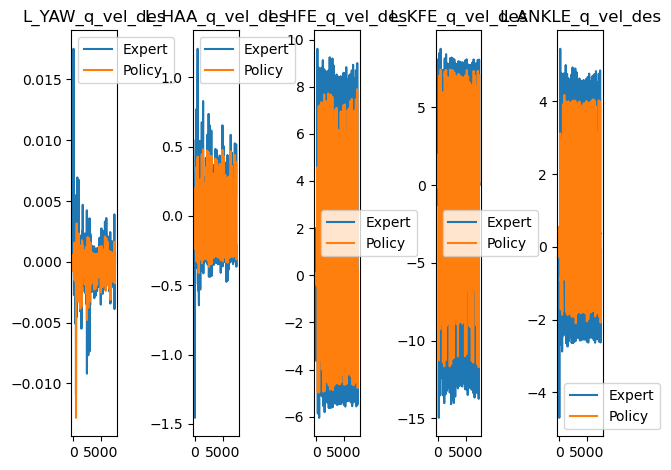

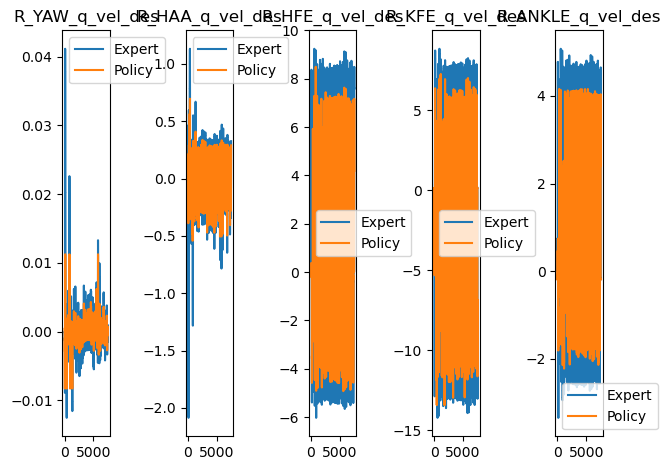

In [4]:
plt.figure()
# create multiple subplots to compare the actions
factor = 6
for j in range(factor):
    for ii in range(len(action_columns) // factor):
        plt.subplot(1, 5, ii + 1)
        index = (j * (len(action_columns) // factor)) + ii
        plt.plot(og_actions[:, index], label="Expert")
        plt.plot(og_policy_actions[:, index], label="Policy")
        plt.title(action_columns[index])
        plt.legend()
    plt.tight_layout()
    plt.show()